<a href="https://colab.research.google.com/github/Prasad-Khedkar/Simple-Neural-Network-Image-Classification/blob/main/Simple_Image_classification_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imorting Libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import confusion_matrix , accuracy_score

## Loading Data

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train,y_train),(x_test, y_test) = fashion_mnist.load_data()

In [4]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [5]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [6]:
np.max(x_train), np.max(y_train)         ## Training set

(255, 9)

In [7]:
np.max(x_test), np.max(y_test)          ## Test set

(255, 9)

In [8]:
class_labels = ['0 Top/T-shirt' , '1 Trouser' , '2 Pullover', '3 Dress','4 Coat', '5 Sandal','6 Shirt','7 Sneaker', '8 Bag','9 Ankle Boot']
print(class_labels)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle Boot']


## Data Explore

8

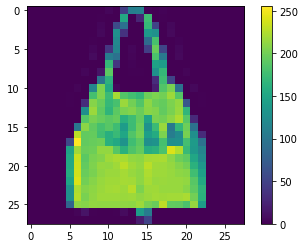

In [9]:
## Data Explore
plt.figure()
plt.imshow(x_train[59000])
plt.colorbar()
y_train[59000]

## Normalizing

In [10]:
## Normalize the dataset

x_train = x_train / 255.0
x_test = x_test /255.0

## Data Flattening for ANN

In [11]:
## Flattening the dataset

x_train.shape,x_test.shape

x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

In [12]:
x_train.shape

x_train.size         ## Total no. of images in x_train

47040000

## Model Building & Compiling

In [13]:
## Building Model

## Model object
model = tf.keras.models.Sequential()      ## sequence of layers

In [14]:
## Adding first fully connected hidden layer
## No. of neurons = 128
## activation function = ReLu
## input shape = 784

model.add(tf.keras.layers.Dense(units = 128 , activation = 'relu' , input_shape = (784,)))


In [15]:
## adding the second layer with dropout

model.add(tf.keras.layers.Dropout(0.3))        ## a regularization technique , prevents overfitting

In [16]:
## adding the output layer .In output layer we have to add only two parameters -
## 1) units = 10 because we have 10 classes for this prob....output variables
## 2) activation function = softmax...since we have more than 2 categories(10)..therefore we are using softmax otherwise ,
## for binary classification we use sigmoid fun

model.add(tf.keras.layers.Dense(units = 10 , activation = 'softmax'))

In [17]:
## Compiling the model

## here the model is compiled 
## 1) Optimizer - adam (minimize the loss function)  adam - adaptive moment estimation is a popular optimization - 
## algorithm used in deep learning for updating the parameters of a neural network

## 2)loss function  = sparse categorical cross entropy (SCCE)
## 3) metrics = sparse_categorical_accuracy

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'sparse_categorical_accuracy')

## Model Summary

In [18]:
## model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Fitting Model

In [19]:
## Training the model

model.fit(x_train,y_train , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5568 - sparse_categorical_accuracy: 0.8041
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4218 - sparse_categorical_accuracy: 0.8468
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3899 - sparse_categorical_accuracy: 0.8580
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3713 - sparse_categorical_accuracy: 0.8622
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3542 - sparse_categorical_accuracy: 0.8706
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3413 - sparse_categorical_accuracy: 0.8743
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3322 - sparse_categorical_accuracy: 0.8765
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3209 - sparse_categorical_accuracy: 0.8819
Epoch 9/10
1875/1875 [=========

## Model Evaluation

In [20]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(test_loss,test_accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.3384 - sparse_categorical_accuracy: 0.8798
0.3384113013744354 0.879800021648407


In [21]:
## Predictions
y_pred = np.argmax(model.predict(x_test),axis=1)    ## for multiclass && for binary classification use : 
##   y_pred=(model.predict(X_test) > 0.5).astype("int32")`

y_pred

y_pred[99], y_test[99]

313/313 [==============================] - 0s 1ms/step


(2, 2)

## Confusion matrix


[[847   1  21  28   4   0  94   0   5   0]
 [  2 965   3  23   3   0   3   0   1   0]
 [ 14   0 846  13  76   0  50   0   1   0]
 [ 24   6  13 903  24   1  24   0   4   1]
 [  0   1 134  42 763   0  59   0   1   0]
 [  0   0   0   0   0 962   0  16   2  20]
 [133   1 131  33  66   0 630   0   6   0]
 [  0   0   0   0   0  26   0 935   0  39]
 [  5   0   3   4   4   2   4   3 975   0]
 [  1   0   0   0   0   7   0  20   0 972]]


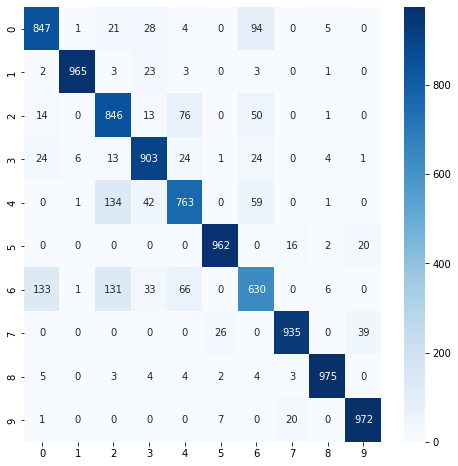

In [22]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize = (8,8))
sns.heatmap(cm , annot = True , cmap = 'Blues' , fmt = 'g')

## Accuracy score

In [23]:
acc_cm = accuracy_score(y_test,y_pred)
acc_cm

0.8798